# Tarea 2 - Machine Learning
---

## Claudia Hazard 201404523-9
## Matías Araya 201173082-8

---

## 1. Tipos de fronteras en Clasificación
---

# a)
---

Se comienza creando dataset con 2 dimensiones, conformado por dos conjuntos de datos.

In [19]:
import numpy as np
import matplotlib.pyplot as plt

n_samples=500
mean = (0,-4)
C = np.array([[0.3, 0.1], [0.1, 1.5]])
datos1 = np.random.multivariate_normal(mean, C, n_samples)
outer_circ_x = np.cos(np.linspace(0, np.pi, n_samples))*3
outer_circ_y = np.sin(np.linspace(0, np.pi, n_samples))*3
datos2 = np.vstack((outer_circ_x,outer_circ_y)).T
from sklearn.utils import check_random_state
generator = check_random_state(10)
datos2 += generator.normal(scale=0.3, size=datos2.shape)

Se agrega ruido al conjunto de datos para así realizar un estudio mas realista.

In [20]:
X = np.concatenate((datos1, datos2), axis=0)
print len(X)
n = 20 #ruido/noise
y1 = np.zeros(datos1.shape[0]+n)
y2 = np.ones(datos2.shape[0]-n)
y = np.concatenate((y1,y2),axis=0)

1000


Con la configuración de el código anterior existen $1000$ datos en total, los cuales $520$ corresponden a un grupo (puntos azules) y $480$ a otro (puntos verdes). Se nota como el ruido de de $20$ correspondientes realmente al grupo azul, se asemejan más a la figura del grupo verde por lo que genera ruido a la muestra.

La función `visualize_border` es de utilidad para visualizar el conjunto de datos con su respectivo clasificador, el que se utilizará en preguntas posteriores.

In [21]:
def visualize_border(model,x,y,title=""):
    fig = plt.figure(figsize=(12,6))

    plt.scatter(x[:,0], x[:,1], s=50, c=y, cmap=plt.cm.winter)
    h = .02 # step size in the mesh
    x_min, x_max = x[:, 0].min() - 1, x[:, 0].max() + 1
    y_min, y_max = x[:, 1].min() - 1, x[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),np.arange(y_min, y_max, h))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contour(xx, yy, Z, cmap=plt.cm.Paired)
    plt.title(title)
    plt.show()

# b) LDA
---

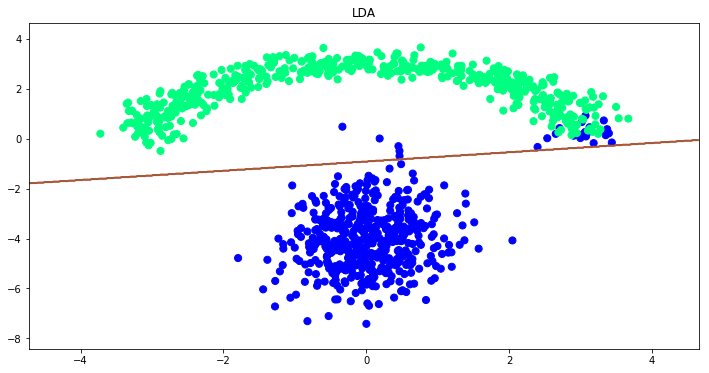

In [22]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
model_lda = LDA()
model_lda.fit(X,y)
visualize_border(model_lda,X,y,"LDA")

Con Linear Discriminant Analysis (LDA), como se ve en la figura mostrada, traza una linea clara que logra separar la clasificación de ambos grupos, quedando así la mayoría de los puntos azules por un lado y la totalidad de los verdes en el otro.

# c) QDA
--- 

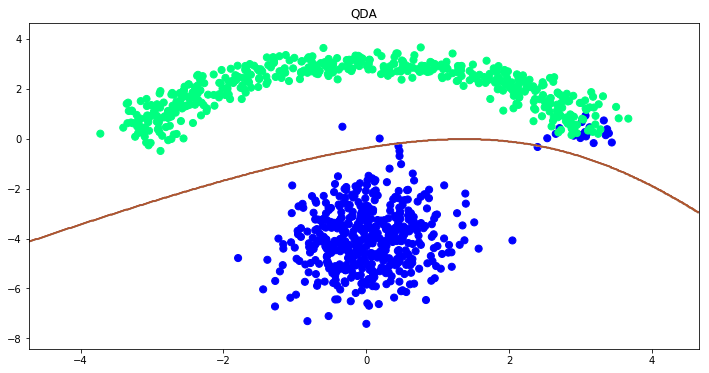

In [23]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA
model_qda = QDA()
model_qda.fit(X,y)
visualize_border(model_qda,X,y,"QDA")

En este caso con Quadratic Discriminant Analysis (QDA), como lo dice su nombre al ser de tipo cuadrático, logra crear una curva asemejandose de mejor manera a la figura y cualitativamente se podría decir que clasifica mejor que LDA. Esto sin embargo conlleva un mayor costo de computación además de mayor posibilidad de overfitting, con lo que se analiza en próxima sección si vale la pena.

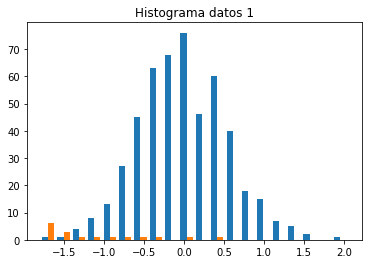

In [24]:
plt.hist(datos1, bins='auto')
plt.title("Histograma datos 1")
plt.show()

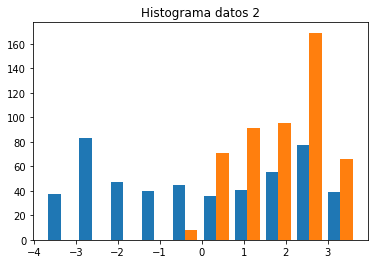

In [25]:
plt.hist(datos2, bins='auto')
plt.title("Histograma datos 2")
plt.show()

# d)
---

In [26]:
from sklearn.metrics import accuracy_score

y_pred_lda = model_lda.predict(X)
y_pred_qda = model_qda.predict(X)

y_true = y

print("Miss Classification Loss LDA: %f"%(1-accuracy_score(y_true, y_pred_lda)))
print("Miss Classification Loss QDA: %f"%(1-accuracy_score(y_true, y_pred_qda)))

Miss Classification Loss LDA: 0.025000
Miss Classification Loss QDA: 0.021000


Con esto se puede ver que la diferencia entre los errores es muy pequña, donde LDA tiene un error de clasificación de $0.021$ y QDA es levemente menor con $0.020$. Con esto se puede comprobar, para este pequeño caso, que no es necesario utilizar QDA ya que genera un gasto extra además de generar un mayor overfitting y no se obtiene una mejor calidad en la predicción.

# e)
---

In [27]:
from ipywidgets import interactive

def visualize_border_interactive(param):
    model = train_model(param)
    visualize_border(model,X,y)

In [28]:
from sklearn.linear_model import LogisticRegression as LR
def train_model(param):
    model=LR() #define your model
    model.set_params(C=param,penalty='l2')
    model.fit(X,y)
    return model

p_min = 0.1
p_max = 10
interactive(visualize_border_interactive, param=(p_min, p_max))

A Jupyter Widget

Como se puede apreciar en el gráfico interactivo, cambiando el paramétro se mueve ligeramente la línea divisiora de la regresión que separa ambas clases. Esto se puede asemejar a lo que hace Ridge o Lasso, donde se penalizan los coeficientes restando importancia a los que influyen de menor manera en el modelo. Así, si el parámetro es bajo, cercano a cero, tiene menos aceptación a que haya puntos mal clasificados. Con el parámetro en $0.1$ ni un punto verde queda completamente en el grupo azul. Mientras que, con un parámetro más alto, por ejemplo $10$ se nota como cambia donde la pendiente de la recta se hace más pronunciada, aceptando así algunos puntos verdes en el grupo azul.

## f)
---

Support Vector Machine (SVM), a diferencia de la otras técnicas que se han visto, busca minimizar la distancia a los puntos más cercanos del hiperplano. No como el resto de los métodos que minimiza los errores.

In [29]:
from sklearn.svm import SVC as SVM #SVC is for classification

def train_model(param):
    model= SVM()
    model.set_params(C=param,kernel='linear')
    model.fit(X,y)
    return model

p_min = 0.1
p_max = 1
interactive(visualize_border_interactive, param=(p_min, p_max))

A Jupyter Widget

El efecto es casi el mismo que la Regresión Logística, donde con una valor alto de el parámetro $C$ la línea divisora queda con una mayor pendiente, aceptando así los valores azules correspondientes al ruido pero incluyendo también unos pocos del conjunto verde. Mientras que con un $C$ cercano a cero permite menos puntos azules de los correspondientes al ruido pero no acepta ni un verde en el conjunto azul. 

## g)
---

Una solución simplificada para SVM no Lineal puede ser escrita como:

$$\hat{f(x)} = \displaystyle\sum_{i=1}^{n} \hat{\alpha_i}y_i K(x,x_i) + \hat{\beta_0}$$

Donde $K(x, x_i)$ es la función Kernel y se cumple que para todo $x_i$, $0 < \alpha_i < C$.

In [30]:
def train_model(param):
    model= SVM()
    model.set_params(C=param,kernel='rbf')
    model.fit(X,y)
    return model

p_min = 0.1
p_max = 1
interactive(visualize_border_interactive, param=(p_min, p_max))

A Jupyter Widget

In [31]:
def train_model(param):
    model= SVM()
    model.set_params(C=param,kernel='poly')
    model.fit(X,y)
    return model

p_min = 0.1
p_max = 1
interactive(visualize_border_interactive, param=(p_min, p_max))

A Jupyter Widget

El rol del parámetro $C$ es claro en un espacio con más atributos, esto dado que una separación perfecta es usualmente conseguible. Un valor grande de $C$ hará que sea más ondulado, mientras que uno más pequeño reflejará curvas más suaves.

El efecto anterior explicado se puede ver de buena manera con el Kernel rbf, donde cambiando el parámetro con un valor de $1$ quedan las líneas más onduladas encerrando al conjunto verde. Mientras cuando se asigna un valor cercano a cero, $0.1$, se ve reflejado que las línas encierran al grupo azul siendo más suave las curvas.

## h)
---

In [40]:
from sklearn.tree import DecisionTreeClassifier as Tree
def train_model(param):
    model= Tree() #edit the train_model function
    model.set_params(max_depth=param,criterion='gini',splitter='best')
    model.fit(X,y)
    return model

p_min = 1
p_max = 4
interactive(visualize_border_interactive, param=(p_min, p_max))

A Jupyter Widget

El parámetro que se varía es el de maxima profundidad del árbol. Primero se realiza el ánalisis con el criterio Gini, el cual es la suma de las varianzas de cada distribución. Con el parámetro igual a $1$, solo se tendrá un árbol de profundidad 1, por lo que, como se ve en la imagen, separa el conjunto de datos en $2$. Separando claramente ambos conjuntos de datos (azules y verdes).

Si esta parámetro aumenta, se agrega un nivel de decisión y de profundidad, por lo que se vuelve más preciso el árbol. Como se puede ver en el código anterior, con 3 niveles es capaz de capturar gran parte del ruido en el conjunto verde a su correspondiente conjunto.

La gran ventaja de este método es su simpleza para ser interpretado, pero sufre de un gran overfitting comparado con los otros métodos anteriormente vistos. Esto se puede comprobar que si el parámetro es $4$, se agrega una tercera clase inexistente con puntos azules y verdes.

In [41]:
from sklearn.tree import DecisionTreeClassifier as Tree
def train_model(param):
    model= Tree() #edit the train_model function
    model.set_params(max_depth=param,criterion='entropy',splitter='best')
    model.fit(X,y)
    return model

p_min = 2
p_max = 8
interactive(visualize_border_interactive, param=(p_min, p_max))

A Jupyter Widget

Se cambia el criterio a information gain, este intenta minimizar la suma pesada de las entropías resultantes. Este es equivalente a maximizar la ganancia de información al dividir el nodo. En otras palabras se debe buscar una medida de la pureza de cada nodo resultante.

Con poca entropía es claro saber a que clase corresponde, si es muy entrópica no se tiene esa claridad.

Con este criterio es notorio que se obtienen mejores resultado cuando el parámetro es alto en comparación a Gini, donde por ejemplo con $8$ logra diferenciar los puntos azules del ruido sin agregar puntos verdes.

## i)
---

In [34]:
from sklearn.neighbors import KNeighborsClassifier

def train_model(param):
    model = KNeighborsClassifier()
    model.set_params(n_neighbors=param)
    model.fit(X,y)
    return model

p_min = 1
p_max = 10
interactive(visualize_border_interactive, param=(p_min, p_max))

A Jupyter Widget

## 2. Análisis de audios como datos brutos
---

In [14]:
from scipy.io import wavfile
def clean_filename(fname, string):
    file_name = fname.split('/')[1]
    if file_name[:2] == '__':
        file_name = string + file_name
    return file_name

def load_wav_file(name, path):
    s, b = wavfile.read(path + name)
    assert s == SAMPLE_RATE
    return b

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math

In [16]:
a="asd/asda/asddsa"
a.split("/")
print(a)

asd/asda/asddsa


## a)
Construya un dataframe con los datos a analizar. Describa el dataset y determine cuántos registros hay
por clase.

In [17]:
import pandas as pd
import numpy as np
df = pd.read_csv('./latidos/set_a.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 176 entries, 0 to 175
Data columns (total 4 columns):
dataset     176 non-null object
fname       176 non-null object
label       124 non-null object
sublabel    0 non-null float64
dtypes: float64(1), object(3)
memory usage: 5.6+ KB


In [18]:
import csv

file = csv.reader(open("set_a.csv"))
d1=[]
d2=[]
d3=[]
d4=[]
for _,fname,label,_ in file:
    if "/" in fname:
        a =clean_filename(fname,"")
        tipo=a.split("__")[0]
        nom=a.split("__")[1]
        dat=load_wav_file(nom,"./latidos/")
        if tipo=="normal":
            d1.extend(dat)
        if tipo=="murmur":
            d2.extend(dat)
        if tipo=="artifact":
            d3.extend(dat)
        if tipo=="extrahls":
            d4.extend(dat)        
plt.hist([d1, d2, d3, d4],color=["r","y","b","g"],label=["Normal","Murmur","Artifact","Extra Heart Sound"],alpha=0.7)
plt.legend(loc='upper right')
plt.rcParams["figure.figsize"] = (18,8)
plt.show()

NameError: global name 'SAMPLE_RATE' is not defined

Se analiza como son los archivos wav:

In [ ]:
import csv

file = csv.reader(open("set_a.csv"))
d1=[]
d2=[]
d3=[]
d4=[]
for _,fname,label,_ in file:
    if "/" in fname:
        a =clean_filename(fname,"")
        tipo=a.split("__")[0]
        nom=a.split("__")[1]
        dat=load_wav_file(nom,"./latidos/")
        if tipo=="normal":
            d1.extend(dat)
        if tipo=="murmur":
            d2.extend(dat)
        if tipo=="artifact":
            d3.extend(dat)
        if tipo=="extrahls":
            d4.extend(dat)        
plt.hist([d1, d2, d3, d4],color=["r","y","b","g"],label=["Normal","Murmur","Artifact","Extra Heart Sound"],alpha=0.7)
plt.legend(loc='upper right')
plt.rcParams["figure.figsize"] = (18,8)
plt.show()


In [ ]:
plt.hist(d1,color="r",label="Normal",alpha=0.7)
plt.legend(loc='upper right')
plt.show()
plt.hist(d2,color="y",label="Murmur",alpha=0.7)
plt.legend(loc='upper right')
plt.show()
plt.hist(d3,color="b",label="Artifact",alpha=0.7)
plt.legend(loc='upper right')
plt.show()
plt.hist(d4,color="g",label="Extra heart sound",alpha=0.7)
plt.legend(loc='upper right')
plt.show()


In [ ]:
def sonidos(a):
    uno=0
    dos=0
    tres=0
    cuatro=0

    for i in a:
        if abs(i)>=20000:
            uno=+1
        elif abs(i)>=8000:
            dos+=1
        elif 0>i>-8000:
            tres+=1
        elif 0<i<8000:
            cuatro+=1
    return (uno/len(a),dos/len(a),tres/len(a),cuatro/len(a))
            

In [ ]:
import csv

c1=0
c2=0
c3=0
c4=0
file = csv.reader(open("set_a.csv"))
dataframe=[]
for _,fname,label,_ in file:
    if "/" in fname:
        a =clean_filename(fname,"")
        tipo=a.split("__")[0]
        nom=a.split("__")[1]
        dat=load_wav_file(nom,"./latidos/")
        i=sonidos(dat)
        if tipo!="":
            dataframe.append([nom,tipo,min(dat),max(dat),i[0],i[1],i[2],i[3]])
            if tipo=="normal":
                c1+=1
            if tipo=="murmur":
                c2+=1
            if tipo=="artifact":
                c3+=1
            if tipo=="extrahls":
                c4+=1  
labels=["Nombre","Tipo","Mínimo","Máximo","Extremos","Medios", "LBajos","LAltos"]
df=pd.DataFrame(dataframe,columns=labels)
print(df)

Se crea el dataframe

In [ ]:
print(c1,c2,c3,c4)

## b)
Lea los archivos .wav y transformelos en secuencias de tiempo. Realice un padding de ceros al final de
cada secuencia para que todas queden representadas con la misma cantidad de elementos, explique la
importancia de realizar este paso.

In [ ]:
def padd_zeros(array,length):
    aux = np.zeros(length)
    aux[:array.shape[0]] = array
    return aux
new_df =pd.DataFrame({'file_name' : df['fname'].apply(clean_filename,string='Aunlabelled')})
new_df['time_series'] = new_df['file_name'].apply(load_wav_file, path='path/to/set_a/')
new_df['len_series'] = new_df['time_series'].apply(len)
new_df['time_series']=new_df['time_series'].apply(padd_zeros,length=max(new_df['len_series']))

## c)
Manipule los datos y cambie las etiquetas de los audios por otras asignadas por un doctor experto [4],
el cual afirma que estos cambios son requeridos. Vuelva a determinar cu´antos registros hay por clase.
N´otese que ahora son 3 clases ¿Explique la problem´atica de tener etiquetas mal asignadas en los datos?
¿Un solo dato puede afectar esto?


In [ ]:
new_labels =[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1,
1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 2, 2, 1, 1, 2, 1, 2, 2, 1, 2, 2, 2, 2, 2, 2,
2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1,
1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 2, 1, 0,
2, 2, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 2, 1, 0, 1, 1, 1, 1, 1, 2, 0, 0, 0,
0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
labels = ['artifact','normal/extrahls', 'murmur']
new_df['target'] = [labels[i] for i in new_labels]

## d)
Codifique las distintas clases a valores num´ericos para que puedan ser trabajados por los algoritmos
clasificadores.

In [ ]:
new_df["target"] = new_df["target"].astype('category')
cat_columns = new_df.select_dtypes(['category']).columns
new_df[cat_columns] = new_df[cat_columns].apply(lambda x: x.cat.codes)

## e)
 Desordene los datos, evitando as´ı el orden en el que vienen la gran mayor´ıa de las etiquetas. Cree la
matriz que conforma a los datos en sus dimensiones sin preprocesar, es decir, cada ejemplo es una
secuencia de amplitudes en el tiempo. ¿Las dimensiones de ´esta indica que puede generar problemas?
¿De qué tipo?

In [ ]:
new_df = new_df.sample(frac=1,random_state=44)
X = np.stack(new_df['time_series'].values, axis=0)
y = new_df.target.values
X.shape


## f)
Para pre procesar la secuencia en el tiempo realice una transformada de fourier discreta [5] para pasar
los datos desde el dominio de tiempos al dominio de frecuencias presentes en la se˜nal de sonido.

In [ ]:
X_fourier = np.abs(np.fft.fft(X))


## g)
Para seguir con el pre procesamiento realice un muestreo representativo de los datos a trav´es de una
t´ecnica de muestreo especializada en secuencias ¿En qu´e beneficia este paso? ¿C´omo podr´ıa determinar
si el muestro es representativo?

In [ ]:
from scipy import signal
X_resampled = []
for i in range(X_fourier.shape[0]):
sequence = X_fourier[i,:].copy()
resampled_sequence = signal.resample(sequence, 100000)
X_resampled.append(resampled_sequence)
X_resampled = np.array(X_resampled)
X_resampled.shape

## h)
Genere un conjunto de pruebas mediante la t´ecnica hold-out validation para v

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y, test_size=0.25, random_state=42)

## i)
Realice un proceso de estandarizar los datos para ser trabajados adecuadamente. Recuerde que solo se
debe ajustar (calcular media y desviaci´on est´andar) con el conjunto de entrenamiento.

In [ ]:
from sklearn.preprocessing import StandardScaler
std = StandardScaler(with_mean=True, with_std=True)
std.fit(X_train)
X_train = std.transform(X_train)
X_test = std.transform(X_test)


## j)
Realice una reducci´on de dimensionalidad a trav´es de la t´ecnica PCA, para representar los datos en
d = 2 dimensiones. Recuerde que solo se debe ajustar (encontrar las componentes principales) con el
conjunto de entrenamiento. Visualice apropiadamente la proyecci´on en 2 dimensiones.


In [ ]:
from sklearn.decomposition import PCA
d=2
pca_model = PCA(n_components=d)
pca_model.fit(X_train)
X_pca_train = pca_model.transform(X_train)
X_pca_test = pca_model.transform(X_test)

## k)
Entrene un modelo de Regresi´on Log´ıstica variando el par´ametro de regularizacion C construyendo un
gr´afico resumen del error en funci´on de este hiper-par´ametro. Adem´as entrene una M´aquina de Soporte
Vectorial (SVM) con kernel lineal, variando el hiper-par´ametro de regularizacion C en el mismo rango
que para la Regresi´on Log´ıstica, construyendo el mismo gr´afico resumen. Compare.


In [ ]:
Cs = [0.0001,0.01,0.1,1,10,100,1000]

## l)
Entrene un Arbol de Decisi´on, con la configuraci´on que estime conveniente, variando el hiper-par´ametro ´
regularizador max depth, construyendo un gr´afico resumen del error en funci´on de este par´ametro.
Compare con los modelos anteriores.


In [ ]:
Depths = range(1,30)

## m)
Experimente con diferentes dimensiones d para la proyecci´on de PCA con el prop´osito de obtener un
modelo con menor error. Construya una tabla o gr´afico resumen.

## n)
 Realice otra reducci´on de dimensionalidad ahora a trav´es de la t´ecnica LDA, para representar los datos
en d = 2 dimensiones. Recuerde que s´olo se debe ajustar con el conjunto de entrenamiento, si se muestra
un warning explique el porqu´e. Visualice apropiadamente la proyecci´on en 2 dimensiones.

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
model_lda = LDA(n_components=2)
model_lda.fit(X_train,y_train)
X_pca_train = model_lda.transform(X_train)
X_pca_test = model_lda.transform(X_test)

## o)
Con el prop´osito de encontrar el mejor modelo vuelva a realizar el item h) con el i) en el nuevo espacio
generado por la representaci´on seg´un las d dimensiones de la proyecci´on LDA. Esta nueva representaci´on
¿mejora o empeora el desempe˜no? Explique.

## p)
Intente mejorar el desempe˜no de los algoritmos ya entrenados. Dise˜ne ahora sus propias cracter´ısticas
(feature crafting) a partir de los datos brutos (secuencia de amplitudes), puede inspirarse en otros
trabajos [6] [7] si desea.

## 3. Análisis de emociones en tweets
---

## a)
Construya un dataframe con los datos a analizar. Determine cu´antas clases existen, cu´antos registros
por clase y describa el dataset.

In [ ]:
import pandas as pd
df = pd.read_csv('./emotionanalysis/text_emotion.csv')

## b)
Construya un conjunto de entrenamiento y otro de pruebas, a trav´es de una m´ascara aleatoria, para
verificar los resultados de los algoritmos.

In [ ]:
import numpy as np
msk = np.random.rand(len(df)) < 0.8
df_train = df[msk]
df_test = df[~msk]

## c)
Implemente y explique un pre-procesamiento para los tweets para dejarlos en un formato est´andarizado
en el cual se podr´an trabajar.

## d)
Haga una reducci´on binaria al problema, para trabajarlo como un problema de clasificaci´on de dos clases.
Para esto, agrupe las distintas emociones como positivas y negativas (defina un criterio), se recomienda
codificar las clases como +1 y −1 respectivamente. Recuerde tener presente que el desbalanceo de los
datos puede afectar considerablemente al modelo.


## e)
Para construir un clasificador que determine autom´aticamente la polaridad de un trozo de texto, ser´a
necesario representar los tweets {ti}
n
i=1 disponibles como vectores de caracter´ısticas (features). El tipo
de caracter´ısticas m´as utilizado consiste en contar cu´antas veces aparecen ciertos t´erminos/palabras en
el texto. Para esto, es necesario un vocabulario que, por lo general, se construye mediante la uni´on de
todas las palabras que se observen en los tweets.
Se recomienda utilizar las librer´ıas ofrecidas por sklearn de feature extraction in text [12] (CountVectorizer
y TfidfVectorizer ). Recuerde realizar el ajuste (fit) ´unicamente con el conjunto de entrenamiento,
para luego transformar el conjunto de pruebas (con el m´etodo transform).

## f)
Entrene y compare al menos 5 de los diferentes clasificadores vistos en clases para clasificaci´on binaria
(por ejemplo: Navie Bayes, Multinomial Naive Bayes, LDA, QDA, Regresi´on log´ıstica, SVM y Arboles
de decisi´on) sobre el conjunto de entrenamiento verificando su desempe˜no sobre ambos conjuntos
(entrenamiento y de pruebas), construyendo un gr´afico resumen del error de ´estos.

## g)
 Utilice y explique las m´etricas que calcula la funci´on classification report de la librer´ıa sklearn. En base
a las distintas m´etricas calculadas ¿Cu´ales clasificadores son los que mejor se comportan?


In [ ]:
from sklearn.metrics import classification_report
def score_the_model(model,x,y,xt,yt):
    acc_tr = model.score(x,y)
    acc_test = model.score(xt[:-1],yt[:-1])
    print "Training Accuracy: %f"%(acc_tr)
    print "Test Accuracy: %f"%(acc_test)
    print "Detailed Analysis Testing Results ..."
    print(classification_report(y_test, model.predict(X_test), target_names=['+','-']))

## h)
[Opcional] Visualice las predicciones de alg´un modelo generativo (probabil´ıstico) definido anteriormente,
tomando un subconjunto aleatorio de tweets de pruebas y explorando las probabilidades que asigna el
clasificador a cada clase.


In [ ]:
test_pred = model.predict_proba(X_test)
spl = random.sample(xrange(len(test_pred)), 15)
for text, sentiment in zip(df_test.content[spl], test_pred[spl]):
    print sentiment, text

## i)
Ahora deber´a extender el problema a las m´ultiples clases que tiene presente (las distintas emociones),
es decir, su trabajo ser´a el de predecir una de las distintas emociones de cada tweet. Para esto utilice el
mismo pre-procesamiento realizado en el punto c) y las caracter´ısticas generadas mediante las t´ecnicas
en el punto e). Recuerde que tendr´a que codificar las distintas clases como valores num´ericos enteros.

## j)
Utilice los clasificadores que son extendidos por defecto a m´ultiples clases para detectar emociones en
cada tweet, muestre sus desempe˜nos a trav´es del error de pruebas en un gr´afico resumen.

## k)
Utilice clasificadores binarios que pueden ser extendidos a trav´es de otras t´ecnicas, tal como One vs
One y One vs All/Rest [14]


In [ ]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.multiclass import OneVsOneClassifier
#example
classif = OneVsRestClassifier(model)
classif.fit(X, Y)

## l)
Para el caso de la Regresi´on Log´ıstica compare sus dos m´etodos para ser extendidos a m´ultiples clases.
Uno a trav´es de One vs Rest y otro definiendo que la variable a predecir se distribuye Multinomial.

In [ ]:
LogisticRegression(multi_class='ovr')
2 LogisticRegression(multi_class='multinomial')

## m)
Compare los resultados entre los clasificadores extendidos por defecto y los binarios que son extendidos
mediante otras t´ecnicas, construya una tabla o gr´afico resumen. Los clasificadores que mejor se
comportan en el caso binario ¿Siguen teniendo ese desempe˜no en m´ultiples clases?